In [22]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

from collections import Counter
from matplotlib import pyplot as plt
from preprocess import preprocessor
from preprocess import clean_df
from preprocess import define_vocab_to_remove
from sklearn.preprocessing import LabelEncoder


In [23]:
data = pd.read_csv("labelled_newscatcher_dataset.csv", sep=";") # We import the data

X, y = clean_df(data) # Initial Clean of the dataset

c:\Users\quent\OneDrive\Bureau\NLP\NLP_project\preprocess.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["title"] = filtered_data["title"].astype(str)


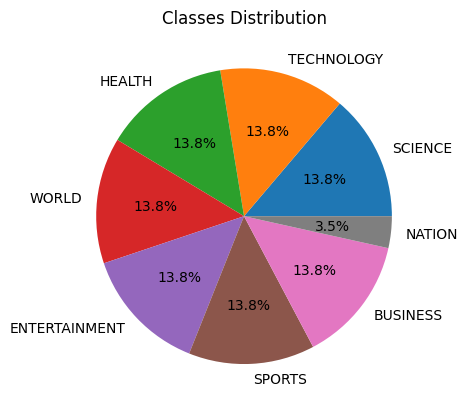

In [24]:
# Plots the distribution of the classes
plt.pie(y.value_counts(), labels = y.unique().tolist(), autopct='%1.1f%%')
plt.title("Classes Distribution")
plt.show()

In [25]:
# Functions to compute the number of words per title 
def set_title_length(df):
    df.loc[:,"title_length"] = 0
    
    for i in range(len(df)):
        df.loc[i,"title_length"] = len(df.loc[i,"title"])

    return df 



In [26]:
df = set_title_length(data[["title","topic"]])

C:\Users\quent\AppData\Local\Temp\ipykernel_21240\1895582830.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,"title_length"] = 0


In [27]:
# Compute the average amount of words for each categories
grouped = df.groupby('topic')
average_df = grouped['title_length'].mean()
average_df

topic
BUSINESS         79.529600
ENTERTAINMENT    75.280333
HEALTH           69.974200
NATION           69.302467
SCIENCE          68.848172
SPORTS           71.769800
TECHNOLOGY       68.126667
WORLD            69.347267
Name: title_length, dtype: float64

In [28]:
# Function to plot the distribution of the titles length
def plot_histo(df):
    plt.hist(df["title_length"],bins=30, rwidth=0.8)
    plt.title("Title length distribution")
    plt.xlabel("title length")
    plt.ylabel("nb samples")
    plt.show()

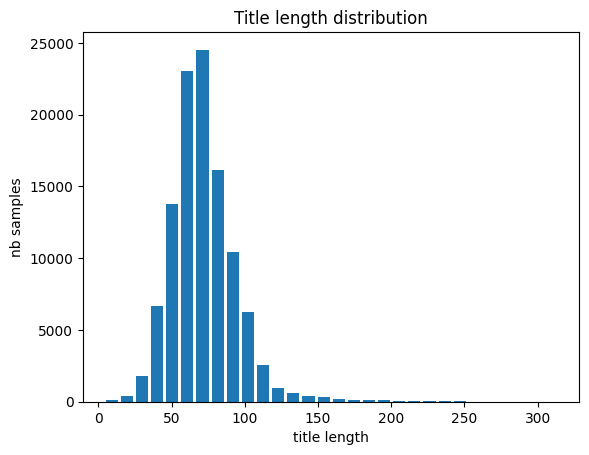

In [29]:
# plot the length of title distribution
plot_histo(df)

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


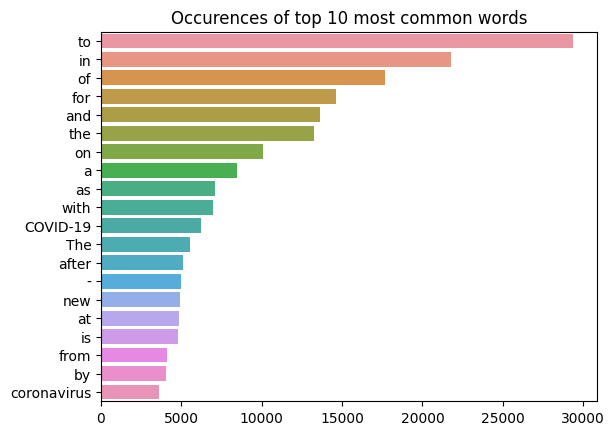

In [32]:

full_text = ' '.join(X)
split_text = full_text.split()

count = Counter(split_text) # Define a Counter object
vocab_count = count.most_common()

# plots the 20 most_common words

words = []
count = []
for word, cnt in vocab_count[:20]:
        words.append(word)
        count.append(cnt)

sns.barplot(x = count, y= words)
plt.title("Occurences of top 10 most common words")
plt.show()

 *There is a lot of stop words in the top words. We can call the preprocessor to remove them* 

In [33]:
# Define the words to remove
words_to_remove = define_vocab_to_remove(X)
len(words_to_remove)

239

In [38]:
# Preprocess the data
for i in range(len(X)):
    X.iloc[i] = preprocessor(X.iloc[i],words_to_remove)

In [39]:
# defining the most common words
full_text = ' '.join(X)
split_text = full_text.split()
vocab = Counter(split_text)
most_common = vocab.most_common()


In [40]:
most_common[:20]

[('test', 2564),
 ('get', 2296),
 ('updat', 2206),
 ('game', 2113),
 ('show', 1851),
 ('call', 1798),
 ('reveal', 1791),
 ('year', 1738),
 ('report', 1723),
 ('launch', 1662),
 ('make', 1654),
 ('star', 1651),
 ('share', 1580),
 ('top', 1516),
 ('time', 1486),
 ('appl', 1475),
 ('million', 1463),
 ('warn', 1438),
 ('deal', 1383),
 ('watch', 1374)]

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


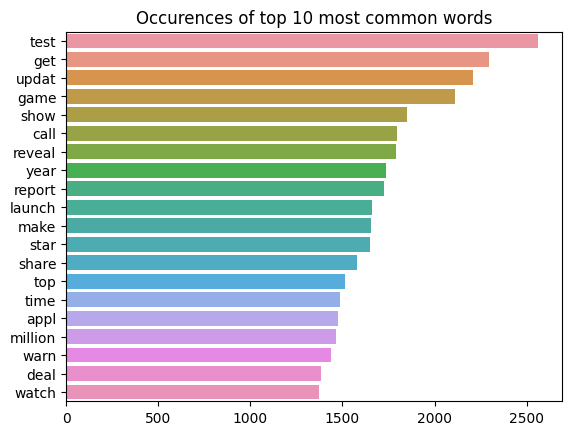

In [41]:
# plots the 20 most_common words

words = []
count = []
for word, cnt in most_common[:20]:
        words.append(word)
        count.append(cnt)

sns.barplot(x = count, y= words)
plt.title("Occurences of top 10 most common words")
plt.show()

In [37]:
new_X = pd.DataFrame(X)
new_X = set_title_length(new_X)

In [42]:
concat_df = pd.concat([new_X,pd.DataFrame(y)],axis=1)

In [43]:
concat_df

,title,title_length,topic
0,A closer look at water-splitting's solar fuel ...,55,SCIENCE
1,"An irresistible scent makes locusts swarm, stu...",54,SCIENCE
2,Artificial intelligence warning: AI will know ...,78,SCIENCE
3,Glaciers Could Have Sculpted Mars Valleys: Study,48,SCIENCE
4,Perseid meteor shower 2020: What time and how ...,100,SCIENCE
...,...,...,...
108769,PDP governors’ forum urges security agencies t...,80,NATION
108770,"In Q2-20, Apple Dominated the Premium Smartpho...",123,BUSINESS
108771,Coronavirus Northern Ireland: Full breakdown s...,89,HEALTH
108772,Paul McCartney details post-Beatles distress a...,84,ENTERTAINMENT


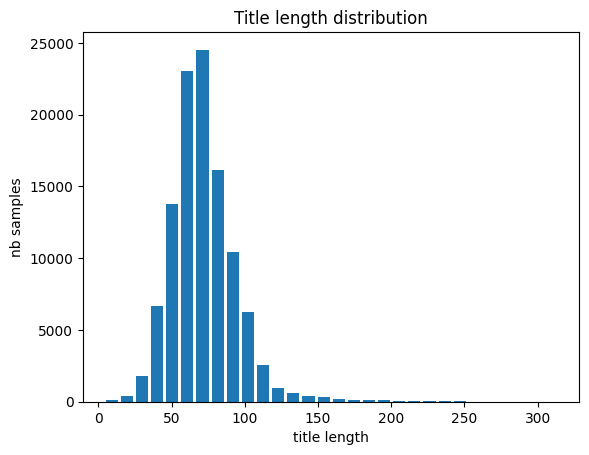

In [44]:
plot_histo(concat_df)

We don't have title with no words


In [45]:
grouped = concat_df.groupby('topic')
average_df = grouped['title_length'].mean()
average_df

topic
BUSINESS         79.529600
ENTERTAINMENT    75.280333
HEALTH           69.974200
NATION           69.302467
SCIENCE          68.848172
SPORTS           71.769800
TECHNOLOGY       68.126667
WORLD            69.347267
Name: title_length, dtype: float64